<a href="https://colab.research.google.com/github/racheltun/5m-data-1.1-intro-data-science/blob/main/5_3_2_(Correct)_Agentic_AI_Workflow_with_LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Agentic AI Workflow with LangGraph**

**Introduction**

Agentic AI refers to AI systems that can act autonomously, reason over goals, and decide which steps or tools to use to achieve tasks.

**LangGraph** is one of the frameworks to build agentic workflows using nodes (agents) connected via states and conditional edges.

In [ ]:
# System-level dependencies for graph visualization
#!sudo apt-get update
#!sudo apt-get install -y graphviz libgraphviz-dev

In [ ]:
# Python packages
#!pip install --upgrade --quiet \
#    langchain langchain-community langchain-huggingface langchain-chroma \
#    chromadb pypdf unstructured[all-docs] sentence-transformers faiss-cpu \
#    langgraph langchain-google-genai pygraphviz gradio ddgs

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install --quiet requests==2.32.4 google-generativeai==0.8.5 google-ai-generativelanguage==0.6.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 2.1.12 requires google-ai-generativelanguage<1,>=0.7, but you have google-ai-generativelanguage 0.6.15 which is incompatible.
langchain-community 0.3.31 requires requests<3.0.0,>=2.32.5, but you have requests 2.32.4 which is incompatible.
google-adk 1.17.0 requires opentelemetry-api<=1.37.0,>=1.37.0, but you have opentelemetry-api 1.38.0 which is incompatible.
google-adk 1.17.0 requires opentelemetry-sdk<=1.37.0,>=1.37.0, but you have opentelemetry-sdk 1.38.0 which is incompatible.
opentelemetry-exporter-otlp-proto-http 1.37.0 requires opentelemetry-exporter-otlp-proto-common==1.37.0, but you have opentelemetry-exporter-otlp-proto-common 1

In [ ]:
!pip install langchain langchain-community langchain-huggingface langchain-chroma langchain-google-genai

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached google_ai_generativelanguage-0.9.0-py3-none-any.whl.metadata (10 kB)
Using cached google_ai_generativelanguage-0.9.0-py3-none-any.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.8/449.8 kB 13.9 MB/s eta 0:00:00
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.0.4
    Uninstalling langchain-core-1.0.4:
      Successfully uninstalled langchain-core-1.0.4
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently

In [ ]:
!pip install sentence-transformers pypdf gradio

In [ ]:
pip install -U "langgraph==0.2.28"

  Using cached langchain_core-0.3.79-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 7.2 MB/s eta 0:00:00
Using cached langchain_core-0.3.79-py3-none-any.whl (449 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.0.4
    Uninstalling langchain-core-1.0.4:
      Successfully uninstalled langchain-core-1.0.4
  Attempting uninstall: langgraph-checkpoint
    Found existing installation: langgraph-checkpoint 3.0.1
    Uninstalling langgraph-checkpoint-3.0.1:
      Successfully uninstalled langgraph-checkpoint-3.0.1
  Attempting uninstall: langgraph
    Found existing installation: langgraph 1.0.2
    Uninstalling langgraph-1.0.2:
      Successfully uninstalled langgraph-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langgraph-prebuilt 1.0.2 requires langchain-core>=1.0.0,

TypedDict lets you type-check dicts with a fixed schema; List is the (older) generic for lists.

====================

from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

using RetrievalQA and PromptTemplate exactly as you’ve imported them. It builds a tiny vector store (FAISS), sets a custom prompt, and runs a query.

==============
from langchain.retrievers import EnsembleRetriever

blend multiple retrievers (e.g., BM25 + vectors) and often boosts recall

In [ ]:
from typing import TypedDict, List
import datetime
import chromadb
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.ddg_search.tool import DuckDuckGoSearchRun
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.tools import tool
from langchain.retrievers import EnsembleRetriever
from google.colab import userdata
import gradio as gr

re means “regular expression”, and it’s also the Python module name used for working with text patterns.

Regular expressions are like smart text finders.
Instead of matching exact words, you can describe patterns.

Example:

import re

text = "My phone number is 9876-1234."
pattern = r"\d{4}-\d{4}"   # means "4 digits - 4 digits"

In [ ]:
from typing import TypedDict, List
import datetime
import chromadb
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma
from langchain.agents import initialize_agent, Tool
from langchain_community.tools.ddg_search.tool import DuckDuckGoSearchRun
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.tools import tool
from langchain.retrievers import EnsembleRetriever
from google.colab import userdata
import gradio as gr
import re

### **1. Configuration**

In [ ]:
PERSIST_DIR = "/content/drive/MyDrive/chroma_db"
EMBEDDINGS = HuggingFaceEmbeddings(model_name="all-mpnet-base-v2")

api_key = userdata.get("GEMINI_API_KEY")
LLM = ChatGoogleGenerativeAI(model="gemini-2.5-flash", google_api_key=api_key)

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### **2. Load Persisted Collections and Define Retrievers**

k=5 means “return the top 5 most relevant chunks/documents” from the vector store when the retriever runs. It’s the top-k cutoff.

weights=[0.5, 0.5] ⇒ give equal importance to policy_retriever and product_retriever.

In [ ]:
client = chromadb.PersistentClient(path=PERSIST_DIR)
collections_dict = {}

for col in client.list_collections():
    print(f"Loading collection: {col.name}")
    collections_dict[col.name] = Chroma(
        collection_name=col.name,
        embedding_function=EMBEDDINGS,
        persist_directory=PERSIST_DIR
    )

print("✅ All collections loaded successfully!")

policy_retriever = collections_dict.get("policy_collection").as_retriever(search_kwargs={"k": 5})
product_retriever = collections_dict.get("product_collection").as_retriever(search_kwargs={"k": 5})

ensemble_retriever = EnsembleRetriever(
    retrievers=[policy_retriever, product_retriever],
    weights=[0.5, 0.5]
)

Loading collection: product_collection
Loading collection: policy_collection
✅ All collections loaded successfully!


### **3. Define Agent State**

**AgentState** is a dictionary or TypedDict storing all relevant information about the conversation or task.

In [ ]:
class AgentState(TypedDict, total=False):
    query: str                 # current user message
    response: str              # latest agent response
    tools_used: List[str]      # optional: record tools invoked
    next_node: str             # router decision
    history: List[str]         # recent user messages for context

### **4. Define Tools for Agents**

In LangChain (and similar frameworks), a tool is simply a function or capability that the agent can call to perform specific actions — such as:

searching documents (retriever)

running code (python_repl)

querying APIs (e.g., weather, database, calculator)

In [ ]:
# Tool 1: Days calculator
!pip install ddgs
@tool
def days_tool(received_date_str: str) -> int:
    """
    Tool to calculate the number of days elapsed from a given date to today.
    Returns -1 if the date format is invalid.
    """
    try:
        received_date = datetime.datetime.strptime(received_date_str, "%Y-%m-%d").date()
        today = datetime.datetime.now().date()
        return str((today - received_date).days)
    except ValueError:
        return -1

# Tool 2: Extract order number and date received from user message
@tool
def parser_tool(query: str) -> dict:
    """
    Extracts an 8-digit order number and YYYY-MM-DD date from a text string.
    Returns a dictionary: {"order_number": str | None, "received_date": str | None}
    """
    order_match = re.search(r"\b(\d{8})\b", query)
    date_match = re.search(r"\b(\d{4}-\d{2}-\d{2})\b", query)
    return {
        "order_number": order_match.group(1) if order_match else None,
        "received_date": date_match.group(1) if date_match else None
    }

# Tool 3: Web search
# Create an instance of the search tool
search = DuckDuckGoSearchRun()

# Define it as a Tool for agent to use
web_search_tool = Tool(
    name="duckduckgo_search",
    func=search.run,
    description="A tool for searching the web for current events or facts."
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 96.3 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.4.0
    Uninstalling lxml-5.4.0:
      Successfully uninstalled lxml-5.4.0


### **5. Set the Goal for Each Agent (Define the Prompts)**

For RAG agents:
  ```
  input_variables=["context", "question"]
  ```

For Router Agent:
  ```
  input_variables=["history", "query"]
  ```

In [ ]:
# Router Agent Prompt
ROUTER_PROMPT = PromptTemplate.from_template(
    template="""
Your goal is to direct the user's query to the correct specialized agent.
Consider the full conversation history to understand the user's intent.

Available agents:
- 'refund_return_agent': For refunds, returns, or exchanges.
- 'product_agent': For product recommendations or details.
- 'policy_agent': For questions about company policies, including refunds, warranties, delivery, and FAQs.
- 'human_escalation_agent': For queries that do not fit the above categories, or when the user requests a live agent.

Rules:
- Output only the exact name of the correct agent.
- If you are unsure, or if the user explicitly requests a human, output 'human_escalation_agent'.
- Do not include explanations or any additional text.

----------------
Conversation History: "{history}"
----------------
Current Query: "{query}"
Agent:
"""
)

# Policy Agent Prompt
POLICY_PROMPT = PromptTemplate.from_template(
    template="""
Your goal is to help the user with their queries on the company policies using the knowledge base.
Only provide information found in the knowledge base. Do not make up information.
**Do not** mention the knowledge base, your tools, or your internal process in your final answer.
Reply in a friendly manner and always use 'we' as you are representing the company.

----------------
Konwledge Base: "{context}"
----------------
Current Query: "{question}"
Helpful Answer:
"""
)

# Product Agent Prompt
PRODUCT_PROMPT = PromptTemplate.from_template(
    template="""
Your goal is to provide accurate product information to the user using the knowledge base.
Only provide information found in the knowledge base. Do not make up information.
**Do not** mention the knowledge base, your tools, or your internal process in your final answer.
Reply in a friendly manner and always use 'we' as you are representing the company.

----------------
Knowledge Base: "{context}"
----------------
Current Query: "{question}"
Helpful Answer:
"""
)

# Refund Agent Prompt
REFUND_PROMPT = PromptTemplate.from_template(
    template="""
You are an assistant specialized in processing refunds and returns for customers.
You goal is to determine if the user is eligible for a refund or return for any reason. First, check if the item the user wants to return is indeed a product within the knowledge.
If the number of days since received date is more than the return window stated in the knowledge base, please inform the user that they are not eligible for a refund with polite explanation.
Only provide information found in the knowledge base.
Do not make up information. Do not use your internal knowledge.
**Do not** mention the knowledge base, your tools, or your internal process in your final answer.

1. If the user has provided an 8-digit order number and a received date in YYYY-MM-DD format, use them only if the date given is valid.
2. If either is missing, ask the user clearly for only the missing information.
3. Avoid asking information already provided in previous messages.

----------------
Knowledge base: "{context}"
----------------
Current Query: "{question}"
Helpful Answer:
"""
)

# Human Agent Prompt
HUMAN_PROMPT = PromptTemplate.from_template(
    template="""
You are a friendly and helpful human support agent. The user's query could not be handled by the automated system.
Initiate the chat with "Hi, you have reached a human agent. How can I help you?"
Please review the user's message and conversation history to provide helpful responses to the user.
Do not need to repeat the chat history and try to mimic human as much as possible in your response.
If the answer is unknown, use the web_search tool to respond why you are unable to help, providing some context.

----------------
Knowledge base: "{context}"
----------------
Current Query: "{question}"
Helpful Answer:
"""
)

### **5. Define Specialized Agents/Nodes**

Great question. In LangChain, different chains/LLM calls return different shapes. Sometimes you get a plain str, sometimes a dict like {"result": "...", "source_documents": [...]}, other times an AIMessage, LLMResult, or even a list of Generation objects. If you pass that raw, mixed output downstream, you’ll hit brittle bugs.

“Normalize” means: turn whatever comes back into one clean str (and optionally keep sources separately).

isinstance and hasattr are Python built-ins used for type checks and attribute checks.

isinstance(obj, type_or_tuple)

Returns True if obj is an instance of the given class or its subclass.

isinstance(3, int)                 # True
isinstance(True, int)              # True (bool is a subclass of int)
isinstance(3.1, (int, float))      # True (tuple = “any of these”)

==============

hasattr(obj, "name")

Returns True if obj has an attribute called "name" (i.e., getattr(obj, "name") doesn’t raise AttributeError).

class Msg:
    content = "hello"
m = Msg()
hasattr(m, "content")  # True
hasattr(m, "text")     # False

==============

numerate(..., start=1) — this adds a counter starting from 1 for each item:

list(enumerate(["msg3", "msg2", "msg1"], start=1))
# [(1, 'msg3'), (2, 'msg2'), (3, 'msg1')]

=============

In [ ]:
def extract_response(raw_response):
    """
    Normalizes the output from RetrievalQA or an LLM call into plain text.
    """
    if isinstance(raw_response, dict):
        # RetrievalQA usually returns {"result": "...", "source_documents": ...}
        return raw_response.get("result", str(raw_response))
    elif hasattr(raw_response, "content"):
        return raw_response.content
    return str(raw_response)

# Define a template for RAG agents
def rag_agent_node(state: AgentState, retriever, agent_name: str, prompt: PromptTemplate, tools=None):
    query = state['query']

    chain = RetrievalQA.from_chain_type(
        llm=LLM,
        chain_type="stuff",
        retriever=retriever,
        chain_type_kwargs={"prompt": prompt}
    )

    raw_response = chain.invoke({"query": query})
    response_text = extract_response(raw_response)

    return {"response": response_text, "tools_used": [agent_name]}

# Policy Agent
def policy_agent_node(state: AgentState):
    """
    LangGraph node for policy/FAQ questions such as warranty, refund, return and shipping/delivery using a RAG-based agent with tools.
    """
    return rag_agent_node(state, policy_retriever, "PolicyAgent", tools=[web_search_tool], prompt=POLICY_PROMPT)

# Product Agent
def product_agent_node(state: AgentState):
    """
    LangGraph node for product recommendations using a RAG-based agent with tools.
    """
    query = state.get("query", "")
    history = state.get("history", [])

    enriched_query = f"Current Message: {query}\n"
    for i, msg in enumerate(reversed(history), start=1):
        enriched_query += f"Previous Message {i}: {msg}\n"

    state["query"] = enriched_query

    return rag_agent_node(state, product_retriever, "ProductRecommendationAgent", tools=[web_search_tool], prompt=PRODUCT_PROMPT)

# Refund Agent
def refund_return_agent_node(state: AgentState):
    """
    Refund agent that:
    1. Uses a parser tool to extract order number and date received.
    2. Uses days_tool to calculate days since receipt.
    3. Calls the policy retriever directly to check refund eligibility.
    """
    query = state.get("query", "")
    history = state.get("history", [])

    enriched_query = f"Current Message: {query}\n"
    for i, msg in enumerate(reversed(history), start=1):
        enriched_query += f"Previous Message {i}: {msg}\n"

    today = datetime.datetime.now().date()
    enriched_query += f"Today's date: {today}\n"

    state["query"] = enriched_query

    return rag_agent_node(state, ensemble_retriever, "RefundAgent", tools=[days_tool, parser_tool], prompt=REFUND_PROMPT)

# Human Agent
def human_escalation_node(state: AgentState):
    """
    LangGraph node where the workflow is handed off to an LLM
    to simulate a human agent's response.
    """
    query = state['query']
    history = state.get("history", [])

    enriched_query = f"Current Message: {query}\n"
    for i, msg in enumerate(reversed(history), start=1):
        enriched_query += f"Previous Message {i}: {msg}\n"

    state["query"] = enriched_query

    return rag_agent_node(state, ensemble_retriever, "HumanAgent", tools=[web_search_tool], prompt=HUMAN_PROMPT)

### **6. Define the Router Node**

* Central node that decides which specialized agent to invoke next.

* Uses conversation history + current query to route intelligently.

* Updates state["next_node"] with the agent name.

============

State = the data flowing through the pipeline (inputs, intermediate facts, outputs).

Node = a step in the pipeline that reads the state, does work (LLM call, tool, retrieval, routing), and writes updates back to the state.

=============

state → router_node → refund_node → answer_node → done

=============

state = {
  "query": "I want to return my shoes",
  "response": "You can return within 30 days.",
  "route": "RefundAgent",
  "history": [
      ["User", "I bought shoes last week."],
      ["Bot", "Sure, how can I help?"]
  ]
}

==============


In [ ]:
def router_node(state: dict):
    """
    Router node that decides which agent to invoke next.
    Maintains a rolling history of the last 3 user queries.
    """

    # Append current query to history
    user_query = state.get("query", "").strip()
    state.setdefault("history", []).append(user_query)
    state["history"] = state["history"][-5:]  # keep only last 5 messages

    # Call LLM/RAG router chain with both variables
    router_chain = ROUTER_PROMPT | LLM
    response_message = router_chain.invoke({
        "query": user_query,                   # current user query
        "history": "\n".join(state["history"])  # recent context
    })

    # Determine next agent node
    tool_name = response_message.content.strip().lower()
    valid_nodes = ["refund_return_agent", "product_agent", "policy_agent"]

    # Update state with router decision
    state["next_node"] = tool_name if tool_name in valid_nodes else "human_escalation_agent"

    return state

### **7. Build StateGraph & Compile Workflow**

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 41 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 

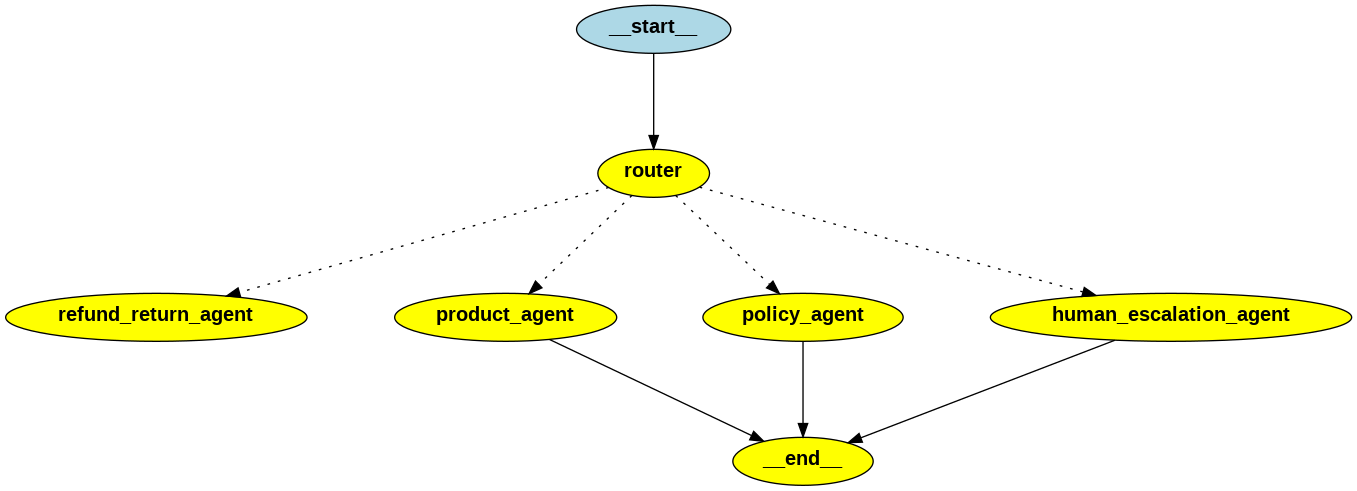

In [ ]:
# Build
!sudo apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz
workflow = StateGraph(AgentState)
workflow.add_node("router", router_node)
workflow.add_node("refund_return_agent", refund_return_agent_node)
workflow.add_node("product_agent", product_agent_node)
workflow.add_node("policy_agent", policy_agent_node)
workflow.add_node("human_escalation_agent", human_escalation_node)

# Set the router as the single entry point for all queries
workflow.set_entry_point("router")

# Conditional edges from the router to the specialized agents
workflow.add_conditional_edges(
    "router",
    lambda state: state["next_node"],
    {
        "refund_return_agent": "refund_return_agent",
        "product_agent": "product_agent",
        "policy_agent": "policy_agent",
        "human_escalation_agent": "human_escalation_agent",
    }
)

# Terminal edges for one-shot agents
workflow.add_edge("product_agent", END)
workflow.add_edge("policy_agent", END)
workflow.add_edge("human_escalation_agent", END)

# Compile graph
app = workflow.compile()

# Visualize
app.get_graph().draw_png("agentic_rag_graph.png")
# Display in Colab
display(Image("agentic_rag_graph.png"))

### **8. Deploy in Gradio**

=============

final_state is whatever your LangGraph app returns from app.invoke(state).
Ideally, LangGraph returns the state dict (your AgentState) after the graph finishes.

=============

In [ ]:
session_states = {}
session_id = "user123"

def chatbot_fn(message, history, session_id="user123"):
    # --- initialize session state safely ---
    if session_id not in session_states or not isinstance(session_states[session_id], dict):
        session_states[session_id] = {"query": message, "history": []}
    else:
        session_states[session_id]["query"] = message
        # ensure previous state is valid dict
        if "history" not in session_states[session_id]:
            session_states[session_id]["history"] = []

    if history is None:
        history = []

    try:
        # --- invoke LangGraph safely ---
        final_state = app.invoke(session_states[session_id])

        # --- normalize final state ---
        if not isinstance(final_state, dict):
            # fallback if node returned something unexpected
            final_state = {"response": str(final_state), "tools_used": []}
        else:
            # ensure response is always a string
            response = final_state.get("response", "I'm not sure how to respond.")
            if isinstance(response, dict):
                response = str(response.get("result", str(response)))
            elif not isinstance(response, str):
                response = str(response)
            final_state["response"] = response

        # --- update session state ---
        session_states[session_id] = final_state

        response = final_state["response"]

    except Exception as e:
        response = f"⚠️ Error: {str(e)}"

    # --- append user+bot to chat history ---
    history.append([message, response])

    return history, ""  # textbox clears after submit

# --- Gradio UI ---
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("## 🛎️ AI Support Agent Chatbot\nAsk me about refunds, returns, products, or policies.")

    chatbot = gr.Chatbot(height=500, label="Chat")
    msg = gr.Textbox(
        placeholder="Type your message here...",
        show_label=False
    )
    clear = gr.Button("🗑️ Clear Chat")

    state = gr.State([])

    # --- submit user message ---
    msg.submit(chatbot_fn, [msg, state], [chatbot, msg])

    # --- clear chat ---
    clear.click(lambda: ([], ""), None, [chatbot, msg])

demo.launch(debug=False, share=True)

/tmp/ipython-input-1655700860.py:51: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(height=500, label="Chat")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://685376a741640779b9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
